In [17]:
import pennylane as qml
from pennylane import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import  preprocessing
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import scipy as sc
import pandas as pd
import random
from PIL import Image

In [18]:
DATASET_PATH = 'Datasets/BrainTumorImage/'
DATA_DF_PATH = DATASET_PATH + "data_df.csv"
IMAGE_DF_PATH = DATASET_PATH + "image_df.csv"
IMAGE_SIDE = 128
TOTAL_INPUTS = IMAGE_SIDE * IMAGE_SIDE
seed = 12
np.random.seed(seed)
random.seed(seed)

In [19]:
data_df = pd.read_csv(DATA_DF_PATH)
image_df = pd.read_csv(IMAGE_DF_PATH)

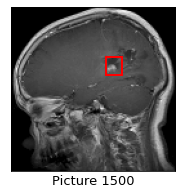

In [20]:
fig = plt.figure(figsize=[10, 10])
fig.patch.set_facecolor('white')


plt.subplot(2, 3, 1)
rand_pick = 1500

img = np.array(image_df.iloc[rand_pick]).reshape((128, 128))

data = data_df.iloc[rand_pick]
corner_x  = data["corner_x"]
corner_y  = data["corner_y"]
width  = data["width"]
height  = data["height"]

plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Picture ' + str(rand_pick), fontsize=13)
currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((corner_x, corner_y), width, height, linewidth=2, edgecolor='r', facecolor='none'))

fig.subplots_adjust(hspace=-0.4)
plt.show()

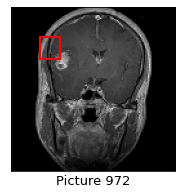

In [21]:
fig = plt.figure(figsize=[10, 10])
fig.patch.set_facecolor('white')


plt.subplot(2, 3, 1)
rand_pick = 972

img = np.array(image_df.iloc[rand_pick]).reshape((128, 128))
#im = Image.fromarray(np.uint8(img))
#new = im.resize((32,32))
#img2=np.asarray(new)

data = data_df.iloc[rand_pick]
corner_x  = data["corner_x"]/1.5
corner_y  = data["corner_y"]/1.5
width  = data["width"]
height  = data["height"]

plt.imshow(img, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.xlabel('Picture ' + str(rand_pick), fontsize=13)
currentAxis = plt.gca()

currentAxis.add_patch(Rectangle((corner_x, corner_y), width, height, linewidth=2, edgecolor='r', facecolor='none'))

fig.subplots_adjust(hspace=-0.4)
plt.show()

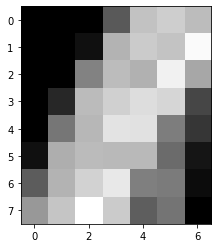

In [22]:
tumor_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
plt.imshow(tumor_, cmap='gray')

In [23]:
pick = [129, 130, 1350, 12, 171, 455, 923]
pick2 = [688, 588, 290, 467, 740, 866, 972]

tumor_list1 = np.empty(shape=[0,8])
benign_list = np.empty(shape=[0,8])

for i in range (5):
    

    img = np.array(image_df.iloc[pick[i]]).reshape((128, 128))
    #im = Image.fromarray(np.uint8(img))
    #new = im.resize((32,32))
    #img2=np.asarray(new)


    data = data_df.iloc[rand_pick]
    corner_x  = data["corner_x"]
    corner_y  = data["corner_y"]
    width  = data["width"]
    height  = data["height"]

    tumor_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
    tumor_Im = Image.fromarray(np.uint8(tumor_))
    tumor_res = tumor_Im.resize((8,1))
    tumor_fin = np.asarray(tumor_res)
    
    tumor_list1 = np.append(tumor_list1, tumor_fin, axis=0)
    

In [24]:
tumor_list2 = np.empty(shape=[0,8])


for i in range (5):
    

    img = np.array(image_df.iloc[pick2[i]]).reshape((128, 128))
    #im = Image.fromarray(np.uint8(img))
    #new = im.resize((32,32))
    #img2=np.asarray(new)

    data = data_df.iloc[rand_pick]
    corner_x  = data["corner_x"]
    corner_y  = data["corner_y"]
    width  = data["width"]
    height  = data["height"]

    tumor_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
    tumor_Im = Image.fromarray(np.uint8(tumor_))
    tumor_res = tumor_Im.resize((8,1))
    tumor_fin = np.asarray(tumor_res)
    
    tumor_list2 = np.append(tumor_list2, tumor_fin, axis=0)

In [25]:
b_list = np.append(pick, pick2)

for i in range (5):
    

    img = np.array(image_df.iloc[b_list[i]]).reshape((128, 128))
    #im = Image.fromarray(np.uint8(img))
    #new = im.resize((32,32))
    #img2=np.asarray(new)

    data = data_df.iloc[rand_pick]
    corner_x  = data["corner_x"]/1.5
    corner_y  = data["corner_y"]/1.5
    width  = data["width"]
    height  = data["height"]

    
    benign_ = img[corner_x.astype(int):(corner_x.astype(int)+8), corner_y.astype(int):(corner_x.astype(int)+8)]
    benign_Im = Image.fromarray(np.uint8(benign_))
    benign_res = benign_Im.resize((8,1))
    benign_fin = np.asarray(benign_res)
    
    benign_list = np.append(benign_list, benign_fin, axis=0)

In [26]:
params = np.random.random(51, requires_grad=True)

x_tumors1 = preprocessing.normalize(tumor_list1, axis=0)
x_tumors2 = preprocessing.normalize(tumor_list2, axis=0)
x_benign = preprocessing.normalize(benign_list, axis=0)

In [27]:
def state_prep(data1, data2):   # Embeds desired classical information to the quantum circuit
    qml.BasisEmbedding(np.array([0, 0, 0, 0]), wires=[0, 1, 2, 3])
    
    for i in range (8):
        qml.RX(data1[i], wires=i+4)

    for j in range (8):
        qml.RX(data2[j], wires=j+12)

    #qml.BasisEmbedding(data2, wires=[5, 6, 7, 8])

In [28]:
# Lets build a circuit, This is where the magic happens.

dev_p = qml.device('default.qubit', wires=20, shots=None)    # Define the quantum device

@qml.qnode(dev_p)
def circuit(params, data1, data2):
    n_qubits = 20
    w_count = 4
    n = 0
    
    state_prep(data1, data2)
 
    while w_count < 20:                                       
        qml.Rot(params[n], params[n+1], params[n+2], wires=w_count)
        w_count += 1
        n += 3
            
    qml.CNOT(wires=[4, 5])
    qml.CNOT(wires=[5, 6])
    qml.CNOT(wires=[6, 7])
    qml.CNOT(wires=[7, 8])
    qml.CNOT(wires=[8, 9])
    qml.CNOT(wires=[9, 10])
    qml.CNOT(wires=[10, 11])
    qml.CNOT(wires=[11, 4])


    qml.CNOT(wires=[12, 13])
    qml.CNOT(wires=[13, 14])
    qml.CNOT(wires=[14, 15])
    qml.CNOT(wires=[15, 16])
    qml.CNOT(wires=[16, 17])
    qml.CNOT(wires=[17, 18])
    qml.CNOT(wires=[18, 19])
    qml.CNOT(wires=[19, 12])

    

    qml.Hadamard(0)             # Ancilla qubit 1
    qml.CSWAP(wires=(0, 2, 4))
    qml.Hadamard(0)
    
    qml.Hadamard(1)             # Ancilla qubit 2
    qml.CSWAP(wires=(1, 3, 12))
    qml.Hadamard(1)


    return qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

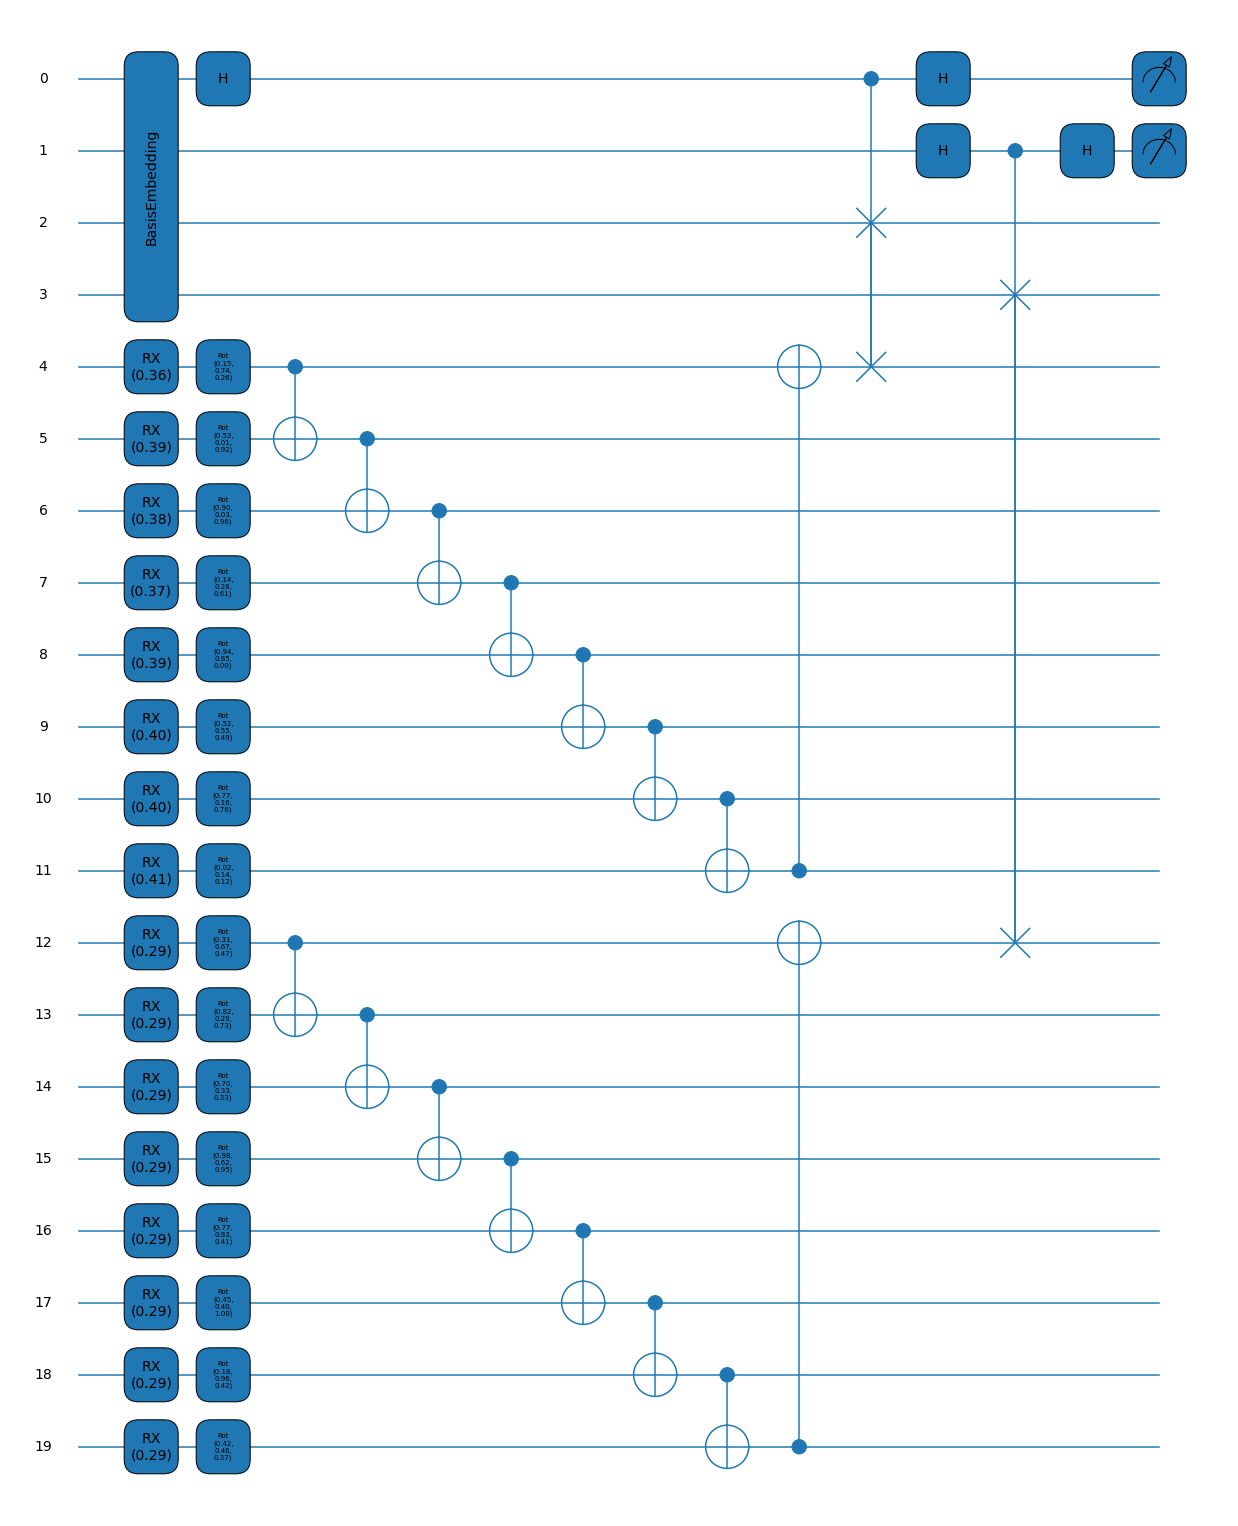

In [29]:
ancilla = circuit(params, x_tumors1[0], x_tumors2[1])
fig, ax = qml.draw_mpl(circuit, show_all_wires=True, decimals=2)(params, x_tumors1[0], x_tumors2[1])

In [30]:
def anci_dist(x, data1, data2, i):
    anci_0, anci_1 = circuit(x, data1[i], data2[i])
    return anci_0, anci_1

In [31]:
def fn_cost(x, data1, data2, i):      # Cost calculation is simple, in perfect match we want: expval(anci) = 0
    funx = 0
    funx2 = 0
    steps = 0
    anci_0, anci_1 = anci_dist(x, data1, data2, i)
    funx += anci_0 + anci_1
    funx2 += anci_1
    cost_hist.append(funx)
    steps += 1
    print(funx)
    return funx

In [32]:
cost_hist = []
cost1_hist = []
weight_tensor = []


for i in range(1):
    minimizer = {'method':'COBYLA', 'args':(x_tumors1, x_tumors2, i)}             # COBYLA was chosen for reduced cpu time. Results are more than satisfactory
    opti = sc.optimize.basinhopping(fn_cost, params, minimizer_kwargs=minimizer, niter=1)
    weight_tensor.append(opti.x)

1.098611339988264
1.0986113399882633
1.0986113399882638
1.0986113399882633
1.0983905696850766
1.036910985218534
1.036910985218534
1.0368811878625184
1.0258058018593035
1.0258058018593037
1.025567467795546
1.0229837815118836
1.0229837815118836
1.0229990705991352
1.023392912232724
1.0229837815118836
1.0230084149223337
1.023191701600129
1.0229837815118836
1.0229871640047747
1.023126188849468
1.0229837815118834
1.0229919420709095
1.0230800414216352
1.022983781511884
1.0229837815118836
1.0229837815118836
1.0229837815118838
1.022160077994277
0.9961270053180027
0.9961270053180029
0.99633655225222
0.9999753884503023
0.9961270053180031
0.9962607687143178
1.0022967170482082
0.9961270053180029
0.9967819823870473
1.0038893812712324
0.9961270053180029
0.9964904510356005
0.9998198963344733
0.9961270053180029
0.9977579990456739
1.0030043292987756
0.9961270053180031
0.9965364452571335
1.0000031678681627
0.9961270053180029
0.9961270053180027
0.9961270053180027
0.9961270053180027
0.9751050139386735
0.93

Text(0.5, 0, '# of Steps')

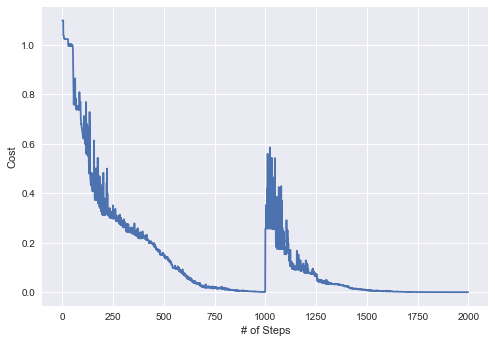

In [37]:
plt.style.use("seaborn")
plt.plot(cost_hist)
plt.ylabel("Cost")
plt.xlabel("# of Steps")

In [41]:
opt_error = []
for i in range (len(x_tumors1)):
    #for j in range (len(x_benign)):
    ancilla1, ancilla2 = circuit(opti.x, x_tumors1[i], x_benign[i])
    total1 = ancilla2
    opt_error.append(total1)
opt_error

[tensor(0.00836857, requires_grad=True),
 tensor(0.05548291, requires_grad=True),
 tensor(0.14784849, requires_grad=True),
 tensor(0.01643596, requires_grad=True),
 tensor(0.03076285, requires_grad=True)]

In [42]:
opt_error_sim = []
for i in range (len(x_tumors1)):
    #for j in range (len(x_tumors2)):
    ancilla1, ancilla2 = circuit(opti.x, x_tumors1[i], x_tumors2[j])
    total = ancilla1
    opt_error_sim.append(total)
opt_error_sim

[tensor(1.34432387e-05, requires_grad=True),
 tensor(0.00043605, requires_grad=True),
 tensor(0.03124565, requires_grad=True),
 tensor(0.01359796, requires_grad=True),
 tensor(0.00588293, requires_grad=True)]

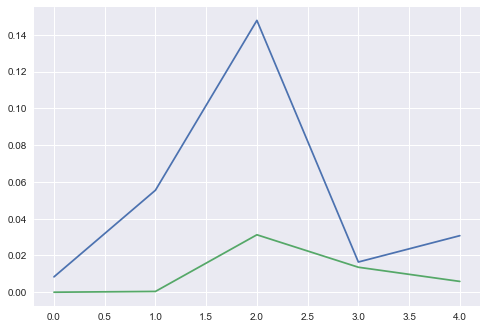

In [43]:
def plot1(ax):

    return ax.plot(opt_error)

def plot2(ax):

    return ax.plot(opt_error_sim)


fig, ax = plt.subplots(1,1)
l1 = plot1(ax)
l2 = plot2(ax)
plt.show()

In [45]:
error = []
for i in range (5):
    #for j in range (len(x_benign)):
    ancilla1, ancilla2 = circuit(params, x_tumors1[i], x_benign[i])
    total2 = ancilla2
    error.append(total2)
error

[tensor(0.51439166, requires_grad=True),
 tensor(0.50701851, requires_grad=True),
 tensor(0.58609324, requires_grad=True),
 tensor(0.51378238, requires_grad=True),
 tensor(0.50832654, requires_grad=True)]

In [46]:
error_sim = []
for i in range (5):
    #for j in range (len(x_benign)):
    ancilla1, ancilla2 = circuit(params, x_tumors1[i], x_tumors2[i])
    total3 = ancilla1
    error_sim.append(total3)
error_sim

[tensor(0.57546215, requires_grad=True),
 tensor(0.57587768, requires_grad=True),
 tensor(0.5363289, requires_grad=True),
 tensor(0.54340518, requires_grad=True),
 tensor(0.55488524, requires_grad=True)]

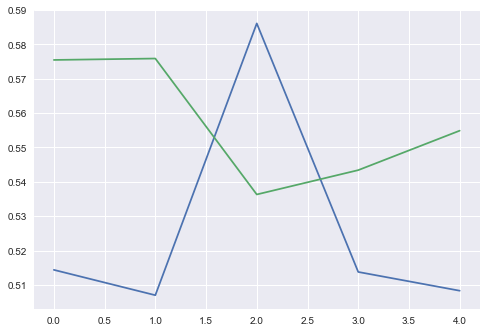

In [47]:
def plot3(ax):

    return ax.plot(error)

def plot4(ax):

    return ax.plot(error_sim)


fig, ax = plt.subplots(1,1)
l1 = plot3(ax)
l2 = plot4(ax)
plt.show()